# <center>Matplotlib可视化</center>

# 1 导入包

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 配置matplotlitb

In [11]:
# 设置matplotlib页内可视
%matplotlib inline
# 设置matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']

# 3 绘制散点图

df = pd.read_csv('./pandas_data/data_processiing/5/5.1/data.csv')
df.head()

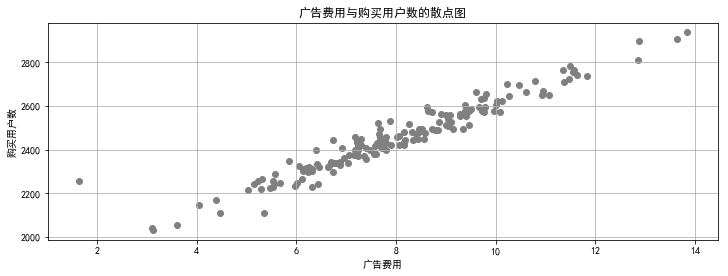

In [47]:
# 绘制广告费用和购买用户数的散点图
plt.figure(figsize=(12, 4))
plt.scatter(df['广告费用'], df['购买用户数'], color='gray')
plt.title('广告费用与购买用户数的散点图')
plt.xlabel('广告费用')
plt.ylabel('购买用户数')
plt.grid(True)
plt.show()

# 4 绘制折线图

**绘图函数中style参数设置：**
- **-：连续的曲线**
- **--：连续的虚线**
- **-.: 连续的带点曲线**
- **:：由点连成的曲线**
- **.：小点，散点图**
- **o：大点，散点图**
- **,：像素点，散点图**
- ***：五角星的点，散点图**

In [50]:
df = pd.read_csv('./pandas_data/data_processiing/5/5.2/data.csv')
df.head()

,日期,购买用户数,广告费用,渠道数
0,2014-01-01,2496,9.14,6
1,2014-01-02,2513,9.47,8
2,2014-01-03,2228,6.31,4
3,2014-01-04,2336,6.41,2
4,2014-01-05,2508,9.05,5


In [53]:
df['购买日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.head()

,日期,购买用户数,广告费用,渠道数,购买日期
0,2014-01-01,2496,9.14,6,2014-01-01
1,2014-01-02,2513,9.47,8,2014-01-02
2,2014-01-03,2228,6.31,4,2014-01-03
3,2014-01-04,2336,6.41,2,2014-01-04
4,2014-01-05,2508,9.05,5,2014-01-05


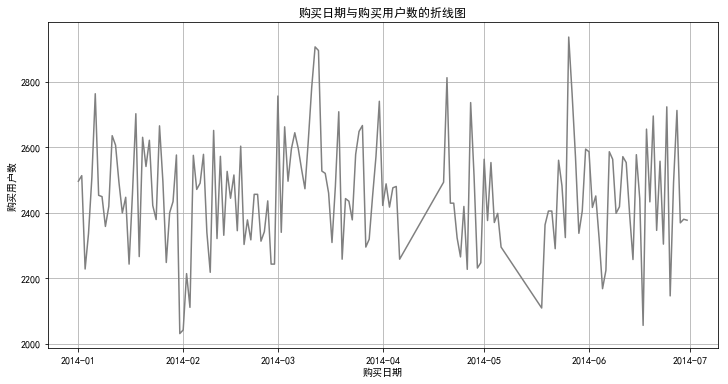

In [76]:
# 购买日期和购买用户数的折线图
plt.figure(figsize=(12, 6))
plt.plot(df['购买日期'], df['购买用户数'], '-',color='gray')
plt.title('购买日期与购买用户数的折线图')
plt.xlabel('购买日期')
plt.ylabel('购买用户数')
plt.grid(True)

# 5 绘制饼图

In [77]:
df = pd.read_csv('./pandas_data/data_processiing/5/5.3/data.csv')
df.head()

,号码,省份,手机品牌,通信品牌,手机操作系统,月消费（元）,月流量（M）
0,166547114238,河北,HTC,神州行,Android,298.9,318.6
1,166423353436,河南,HTC,神州行,Android,272.8,1385.9
2,166556915853,福建,HTC,神州行,Android,68.8,443.6
3,166434728749,湖南,HTC,神州行,Android,4.6,817.3
4,166544742252,北京,HTC,神州行,Android,113.2,837.4


In [81]:
group = df.groupby('通信品牌')[['号码']].agg('count')
group

,号码
通信品牌,
全球通,1209
动感地带,11838
神州行,18355


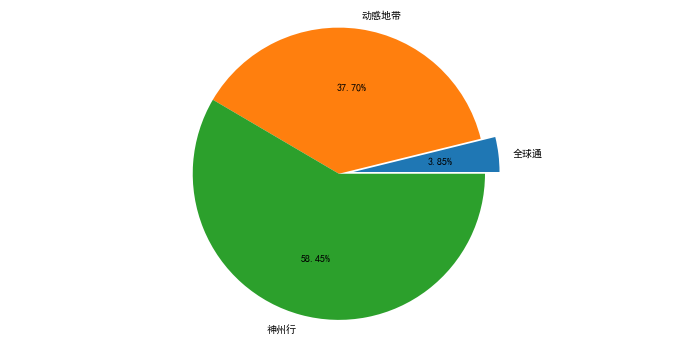

In [88]:
# 绘制饼图
plt.figure(figsize=(12, 6))
plt.pie(group['号码'], explode=[0.1, 0, 0],labels=group.index, autopct='%.2f%%')
plt.axis('equal')
plt.show()

# 6 绘制柱形图

In [89]:
df = pd.read_csv('./pandas_data/data_processiing/5/5.4/data.csv')
df.head()

,号码,省份,手机品牌,通信品牌,手机操作系统,月消费（元）,月流量（M）
0,166547114238,河北,HTC,神州行,Android,298.9,318.6
1,166423353436,河南,HTC,神州行,Android,272.8,1385.9
2,166556915853,福建,HTC,神州行,Android,68.8,443.6
3,166434728749,湖南,HTC,神州行,Android,4.6,817.3
4,166544742252,北京,HTC,神州行,Android,113.2,837.4


In [100]:
# 统计各个手机品牌每月的总消费额
total_consumption = df.groupby('手机品牌')[['月消费（元）']].agg('sum').reset_index()
total_consumption

,手机品牌,月消费（元）
0,HTC,458171.6
1,三星,1009290.8
2,华为,25696.0
3,摩托罗拉,117623.1
4,联想,89443.7
5,苹果,123259.3
6,诺基亚,2840362.9
7,金立,28350.4


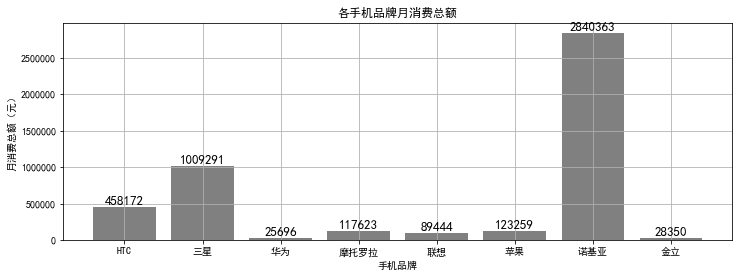

In [123]:
# 画出各个手机品牌月消费总额的柱形图
plt.figure(figsize=(12, 4))
index = np.arange(total_consumption['手机品牌'].size)
plt.bar(index, total_consumption['月消费（元）'], color='gray')
# 设置数据标签
for a, b in zip(index, total_consumption['月消费（元）']):
    plt.text(a, b+0.1, '%.0f' % b, ha='center', va='bottom', fontsize=13)
    
plt.title('各手机品牌月消费总额')
plt.xlabel('手机品牌')
plt.xticks(index, total_consumption['手机品牌'])
plt.ylabel('月消费总额（元）')
plt.grid(True)
plt.show()

In [125]:
# 画出各个手机品牌的不同运营商月消费总额
pivot_total_consumption = df.pivot_table(values='月消费（元）',
                                         index='手机品牌',
                                         columns='通信品牌',
                                         aggfunc='sum'
                                        )
pivot_total_consumption

通信品牌,全球通,动感地带,神州行
手机品牌,,,
HTC,10789.5,83844.7,363537.4
三星,36769.3,351629.7,620891.8
华为,2087.6,6091.0,17517.4
摩托罗拉,4147.9,47145.1,66330.1
联想,5220.1,27285.4,56938.2
苹果,18746.6,73537.0,30975.7
诺基亚,99367.4,1179443.7,1561551.8
金立,2160.9,6291.2,19898.3


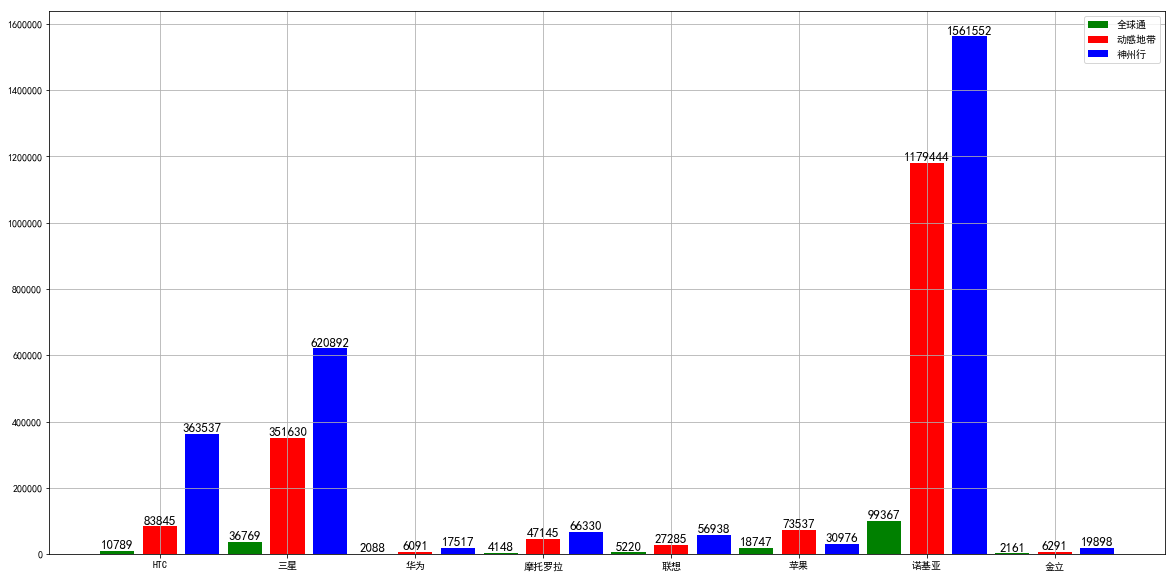

In [171]:
plt.figure(figsize=(20, 10))
height = pivot_total_consumption.index.size
width = pivot_total_consumption.columns.size
index = np.arange(0, height)
color = ['g', 'r', 'b']
for i in range(0, width):
    sub = pivot_total_consumption.iloc[:, i]
    plt.bar(index*width+i, sub, color=color[i])
    #  添加数据标签
    for a, b in zip(index*width+i, sub):
        plt.text(a, b+0.1, '%.0f' % b, ha='center', va='bottom', fontsize=13)
    
plt.xticks(index*width+1, pivot_total_consumption.index)
plt.legend(pivot_total_consumption.columns)
plt.grid(True)